In [243]:
import re
import pandas as pd
import matplotlib.pyplot as plt 

In [244]:
# setup cell
chosen_country = 'Tunisia'
df = pd.read_csv('/kaggle/input/stack-overflow-2023-developers-survey/survey_results_public.csv')
pd.set_option('display.max_columns',84)

In [245]:
df.shape

(89184, 84)

In [246]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [247]:
df.sample(9)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
74661,74662,I agree,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time",In-person,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Colleague;Online Courses or Certification;On t...,Formal documentation provided by the owner of ...,Udemy;Coursera,5,2,Academic researcher,10 to 19 employees,I have some influence,Investigate,Start a free trial;Ask developers I know/work ...,Germany,EUR European Euro,50000.0,C#;Python,Python,MySQL,NaN,NaN,NaN,NaN,NaN,Keras;NumPy;TensorFlow,Hugging Face Transformers;JAX;Keras;NumPy;Tens...,Docker;Homebrew;Kubernetes;Podman,Docker;Homebrew;Kubernetes,IntelliJ IDEA;Jupyter Notebook/JupyterLab;Nano...,IntelliJ IDEA;Jupyter Notebook/JupyterLab;Nano...,MacOS;Other Linux-based,MacOS;Other Linux-based,Markdown File;Microsoft Lists,NaN,Discord;Rocketchat;Whatsapp;Zoom,Whatsapp;Zoom,ChatGPT,ChatGPT,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,Less than once per month or monthly,"No, not at all",NaN,Yes,Very favorable,Increase productivity;Greater efficiency;Speed...,Somewhat distrust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,53545.0
9902,9903,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other;edX;Coursera,15,10,"Engineer, data",20 to 99 employees,I have some influence,Investigate,Start a free trial,Canada,CAD\tCanadian dollar,200000.0,Java;JavaScript;Scala;SQL;TypeScript,JavaScript;Scala;SQL;TypeScript,BigQuery;Couch DB;PostgreSQL,BigQuery;Datomic;PostgreSQL,Amazon Web Services (AWS);Cloudflare;Firebase;...,Amazon Web Services (AWS);Cloudflare;Google Cloud,Node.js;React;Vue.js,Svelte,Apache Spark;Electron;RabbitMQ,Apache Kafka;Apache Spark;Electron;TensorFlow,Ansible;Kubernetes;LLVM's Clang;Maven (build t...,Cargo;Kubernetes;LLVM's Clang;Maven (build too...,Android Studio;Atom;Eclipse;Emacs;IntelliJ IDE...,Sublime Text;Visual Studio Code,iOS;MacOS;Other (Please Specify):,iOS;MacOS;Other (Please Specify):,Confluence;GitHub Discussions;Jira;Markdown File,GitHub Discussions;Markdown File,Discord;Google Chat;Google Meet;Microsoft Team...,Discord;Google Chat;Google Meet;Microsoft Team...,ChatGPT,ChatGPT,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,A few times per month or weekly,Yes,Less than once per month or monthly,"Yes, somewhat",NaN,Yes,Favorable,Greater efficiency,Somewhat distrust,Le

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [249]:
df.loc[df['Country'] == chosen_country].describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,107.000000,37.000000,35.000000,36.000000
mean,44957.943925,36398.540541,3.857143,12646.694444
std,28440.955566,41160.120879,3.639189,13187.075707
min,246.000000,0.000000,0.000000,6.000000
25%,19641.000000,12000.000000,1.500000,4336.250000
50%,42621.000000,20000.000000,3.000000,8030.000000
75%,73571.000000,50000.000000,4.000000,16461.250000
max,88583.000000,200000.000000,16.000000,64239.000000


In [250]:
df.loc[(df['Country'] == chosen_country) & (df['CompTotal'].notna())]['CompTotal']

732           0.0
1108       2500.0
1300      48000.0
1702      50000.0
1896      30000.0
2921      52000.0
4047      12000.0
4050      30000.0
5911      65000.0
6221      14000.0
14383     12000.0
17604      1400.0
19583     20000.0
19888     14000.0
20335     20000.0
22813      2200.0
23392      7128.0
26142     12000.0
26522     18000.0
28852    200000.0
29516     19200.0
32341     80000.0
36313    100000.0
38831     18000.0
42045    110000.0
47642     18000.0
55495        18.0
57655     51000.0
58579      1300.0
60751     36000.0
66587     30000.0
66620     18000.0
70384     40000.0
72671     20000.0
74469     20000.0
78252     55000.0
85044    120000.0
Name: CompTotal, dtype: float64

In [251]:
df[(df['Country'] == chosen_country) & (df['CompTotal'].notna()) & (df['CompTotal'] > 0)].shape[0]
# the number of people that are getting to the bag here

36

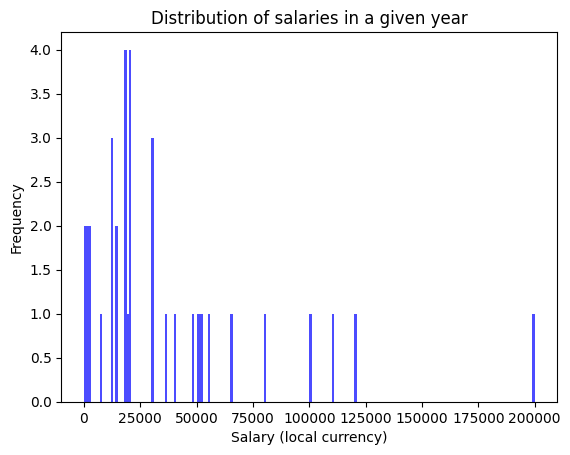

In [252]:
comp_values = df.loc[(df['Country'] == chosen_country) & (df['CompTotal'].notna())]['CompTotal']

plt.hist(comp_values, bins=200, color='blue', alpha=0.7)
plt.xlabel('Salary (local currency)')
plt.ylabel('Frequency')
plt.title('Distribution of salaries in a given year')
plt.show()

In [253]:
df.loc[(df['Country'] == chosen_country) & (df['CompTotal'].notna())]['CompTotal']

732           0.0
1108       2500.0
1300      48000.0
1702      50000.0
1896      30000.0
2921      52000.0
4047      12000.0
4050      30000.0
5911      65000.0
6221      14000.0
14383     12000.0
17604      1400.0
19583     20000.0
19888     14000.0
20335     20000.0
22813      2200.0
23392      7128.0
26142     12000.0
26522     18000.0
28852    200000.0
29516     19200.0
32341     80000.0
36313    100000.0
38831     18000.0
42045    110000.0
47642     18000.0
55495        18.0
57655     51000.0
58579      1300.0
60751     36000.0
66587     30000.0
66620     18000.0
70384     40000.0
72671     20000.0
74469     20000.0
78252     55000.0
85044    120000.0
Name: CompTotal, dtype: float64

In [254]:
df.loc[(df['Country'] == chosen_country) & (df['CompTotal'].notna())]['CompTotal'].agg('mean')
# the average salary per year 

36398.54054054054

In [255]:
# cleanup for the age column 

def cleanup(age):
    if re.search(r'Under 18 years old', age):
        return '0-18'
    elif re.search(r'18-24|18-25', age):
        return '18-25'
    elif re.search(r'25-34|25-35', age):
        return '25-35'
    elif re.search(r'35-44|35-45', age):
        return '35-45'
    elif re.search(r'45-54|45-55', age):
        return '45-55'
    elif re.search(r'55-64|55-65', age):
        return '55-65'
    elif re.search(r'65-74|65-75', age):
        return '65-75'
    elif re.search(r'75-84|75-85', age):
        return '75-85'
    else:
        return ''

df['Age'] = df['Age'].apply(cleanup)


In [256]:
df.sample(10)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
70249,70250,I agree,I am a developer by profession,35-45,"Independent contractor, freelancer, or self-em...",Remote,Hobby;Bootstrapping a business;Professional de...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,Codecademy;Udemy,30,25,"Developer, full-stack",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,Brazil,BRL\tBrazilian real,180000.0,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,Bash/Shell (all shells);C#;Go;HTML/CSS;JavaScr...,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL,Dynamodb;Elasticsearch;Firebase Realtime Datab...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Angular;ASP.NET CORE;CodeIgniter;Express;jQuer...,Angular;ASP.NET CORE;Blazor;CodeIgniter;Deno;E...,.NET (5+) ;.NET Framework (1.0 - 4.8);Ionic;Re...,.NET (5+) ;.NET Framework (1.0 - 4.8);.NET MAU...,APT;Chocolatey;Composer;Docker;Gradle;Homebrew...,APT;Chocolatey;Composer;Docker;Gradle;Homebrew...,DataGrip;Jupyter Notebook/JupyterLab;Notepad++...,DataGrip;Jupyter Notebook/JupyterLab;Notepad++...,MacOS,MacOS,Notion;Trello,Notion;Trello,Discord;Google Meet;Slack;Whatsapp;Zoom,Discord;Google Meet;Slack;Whatsapp;Zoom,Bing AI;ChatGPT,Bing AI;ChatGPT,NaN,NaN,Stack Overflow,Daily or almost daily,No,NaN,"No, not really",NaN,"No, but I plan to soon",Indifferent,NaN,Somewhat trust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,25.0,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly agree,Agree,Agree,Agree,Never,1-2 times a week,Never,15-30 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,36518.0
63178,63179,I agree,I am a developer by profession,55-65,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,NaN,Udemy;Pluralsight,42,37,"Developer, desktop or enterprise applications",100 to 499 employees,I have little or no influence,NaN,Start a free trial;Ask developers I know/work ...,Belgium,EUR European Euro,NaN,C#;C++;Cobol;Delphi;Fortran;Lisp;Python,C#;Delphi,Cosmos DB;Microsoft Access;Microsoft SQL Serve...,Cosmos DB;Microsoft Access;Microsoft SQL Serve...,Microsoft Azure;VMware,Microsoft Azure,ASP.NET;ASP.NET CORE,ASP.NET;ASP.NET CORE,.NET (5+) ;.NET Framework (1.0 - 4.8),.NET (5+) ;.NET Framework (1.0 - 4.

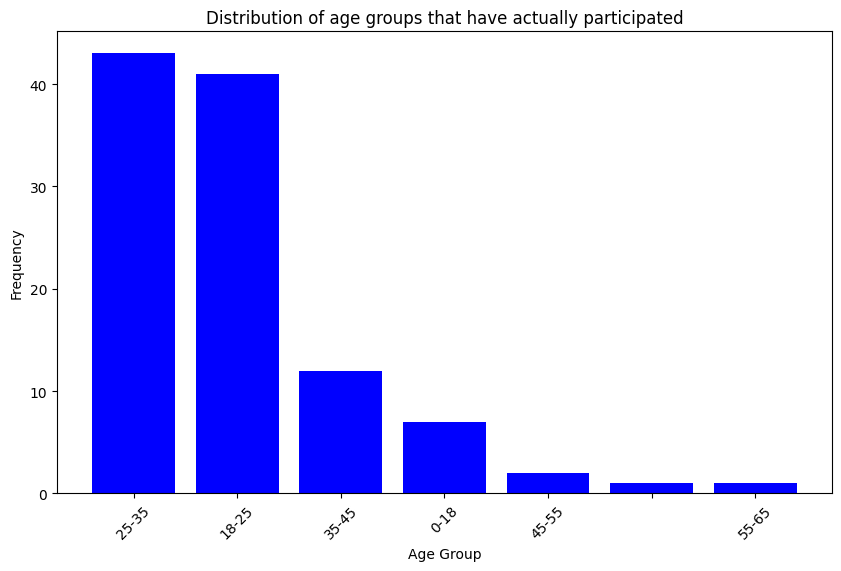

In [257]:
age_counts = df[df['Country'] == chosen_country]['Age'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values, color='blue')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distribution of age groups that have actually participated')
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

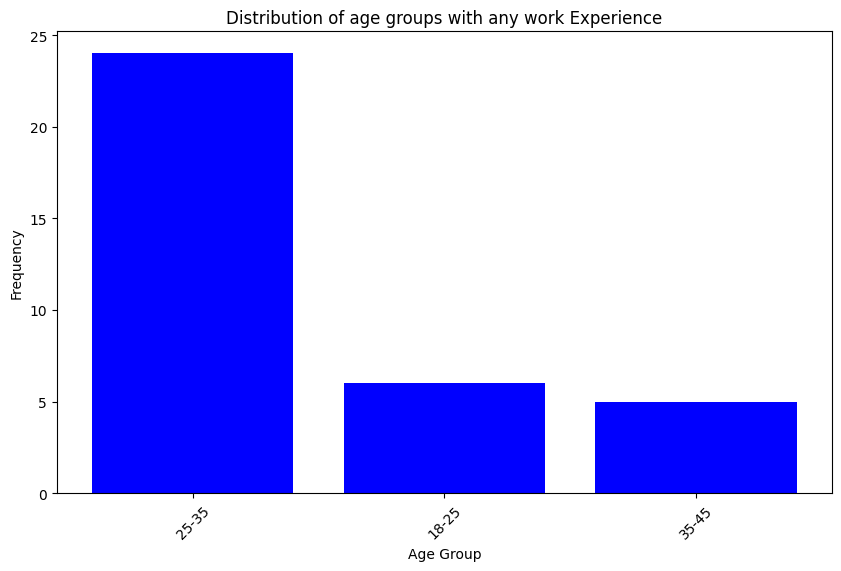

In [258]:
age_counts = df[(df['Country'] == chosen_country) & df['WorkExp'].notna()]['Age'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values, color='blue')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Distribution of age groups with any work Experience')
plt.xticks(rotation=45)

plt.show

In [259]:
df[df['Country'] == chosen_country] \
         .dropna(subset=['WorkExp']) \
         .groupby(['CompTotal', 'Employment','DevType'])['WorkExp'] \
         .mean() \
         .rename('Mean Work Experience grouped by Pay, Employment & Dev Type')

CompTotal  Employment                                                                DevType                                      
0.0        Independent contractor, freelancer, or self-employed                      Developer, full-stack                             3.0
18.0       Employed, full-time                                                       Developer, full-stack                             1.0
1300.0     Employed, full-time                                                       Developer, full-stack                             1.0
1400.0     Employed, full-time                                                       Developer, full-stack                             1.0
2200.0     Employed, part-time                                                       Developer, back-end                               0.0
7128.0     Employed, full-time                                                       Developer, full-stack                             3.0
12000.0    Employed, full-time     

In [260]:
workexp = df[(df['Country'] == chosen_country) & df['WorkExp'].notna()]['WorkExp']
workexp

732       3.0
1300      4.0
1702      3.0
1896      3.0
2921      4.0
4050      3.0
5911     12.0
6221      4.0
14383     1.0
17463     1.0
17604     1.0
19583     2.0
19888     3.0
22813     0.0
23392     3.0
23550     7.0
24449     1.0
26522     7.0
30957    16.0
32341     9.0
36313    13.0
38831     2.0
42045     3.0
49282     6.0
55495     1.0
57484     3.0
57655     4.0
58579     1.0
66587     1.0
70384     3.0
72671     2.0
75378     2.0
77777     3.0
78008     3.0
86377     1.0
Name: WorkExp, dtype: float64

In [261]:
# average work experience
workexp.mean()

3.857142857142857

In [262]:
# max work experience found
workexp.max()

16.0

In [263]:
# who's that ?
x = df[df['ResponseId'] == df.loc[workexp.idxmax()].iloc[0]]
x

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
30957,30958,I agree,"I am not primarily a developer, but I write co...",35-45,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Bootstrapping a business;Professional developm...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,Coursera,16,NaN,Academic researcher,NaN,NaN,Investigate,Start a free trial;Visit developer communities...,Tunisia,NaN,NaN,C;HTML/CSS;JavaScript;PHP;Python,C;HTML/CSS;JavaScript;PHP;Python;TypeScript,Couch DB;MariaDB,Couch DB;Elasticsearch;InfluxDB;MariaDB;SQLite,OVH,Microsoft Azure;OVH,FastAPI;jQuery;Next.js;Node.js,FastAPI;Next.js;Node.js;React,Keras;Scikit-Learn,CUDA;Electron;Keras;Scikit-Learn;TensorFlow;Un...,npm;Visual Studio Solution,npm;Visual Studio Solution,Visual Studio Code,Jupyter Notebook/JupyterLab;Visual Studio Code,Android;Ubuntu;Windows,Android;iOS;Ubuntu;Windows,NaN,NaN,Google Meet;Whatsapp;Zoom,Google Meet;Whatsapp;Zoom,ChatGPT,ChatGPT;Google Bard AI,NaN,NaN,Stack Overflow;Stack Exchange,A few times per month or weekly,Yes,Less than once per month or monthly,Neutral,NaN,Yes,Very favorable,Increase productivity;Speed up learning,Neither trust nor distrust,Documenting code;Committing and reviewing code,Learning about a codebase;Project planning;Wri...,Debugging and getting help;Deployment and moni...,Learning about a codebase;Project planning;Wri...,NaN,NaN,NaN,Debugging and getting help,Yes,Individual contributor,16.0,Agree,Neither agree nor disagree,Disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Never,1-2 times a week,1-2 times a week,30-60 minutes a day,30-60 minutes a day,None of these,Higher Education,Too long,Easy,NaN


In [264]:
# what they do tho
x['DevType']

30957    Academic researcher
Name: DevType, dtype: object

In [265]:
bag = df[(df['Country'] == chosen_country) & df['WorkExp'].notna()]['CompTotal']
bag

732           0.0
1300      48000.0
1702      50000.0
1896      30000.0
2921      52000.0
4050      30000.0
5911      65000.0
6221      14000.0
14383     12000.0
17463         NaN
17604      1400.0
19583     20000.0
19888     14000.0
22813      2200.0
23392      7128.0
23550         NaN
24449         NaN
26522     18000.0
30957         NaN
32341     80000.0
36313    100000.0
38831     18000.0
42045    110000.0
49282         NaN
55495        18.0
57484         NaN
57655     51000.0
58579      1300.0
66587     30000.0
70384     40000.0
72671     20000.0
75378         NaN
77777         NaN
78008         NaN
86377         NaN
Name: CompTotal, dtype: float64

In [266]:
x = df[df['ResponseId'] == df.loc[bag.idxmax()].iloc[0]]
x

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
42045,42046,I agree,I am a developer by profession,25-35,"Employed, full-time",Remote,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,NaN,7,2,"Developer, full-stack",100 to 499 employees,I have little or no influence,NaN,Start a free trial;Ask developers I know/work ...,Tunisia,TND\tTunisian dinar,110000.0,Elixir;Python;Rust;SQL;TypeScript,Elixir;Rust;SQL;TypeScript,BigQuery;MySQL;PostgreSQL;Redis;SQLite,Cassandra;Cockroachdb;Elasticsearch;PostgreSQL...,Amazon Web Services (AWS);Cloudflare;Digital O...,Amazon Web Services (AWS);Cloudflare;Fly.io;Ne...,Laravel;Node.js;Phoenix;React;Svelte;Vue.js,Phoenix;React;Svelte,Electron;NumPy;Opencv;Scikit-Learn,NumPy;Opencv;Tauri;TensorFlow;Torch/PyTorch,Ansible;APT;Cargo;Chocolatey;Docker;Kubernetes...,Ansible;APT;Cargo;Chocolatey;Docker;Kubernetes...,Visual Studio Code,Neovim,Windows;Windows Subsystem for Linux (WSL),Arch;Windows Subsystem for Linux (WSL),Jira;Linear;Miro;Notion,Linear;Notion,Discord;Google Meet;Microsoft Teams;Slack,Discord;Signal;Slack,ChatGPT,ChatGPT,GitHub Copilot;Tabnine,GitHub Copilot,Stack Overflow;Stack Exchange,A few times per week,Yes,Less than once per month or monthly,"No, not really",NaN,Yes,Favorable,Increase productivity;Improve accuracy in coding,Neither trust nor distrust,Writing code;Documenting code,Writing code,Deployment and monitoring,NaN,NaN,Writing code,NaN,NaN,Yes,Individual contributor,3.0,Strongly disagree,Strongly agree,Neither agree nor disagree,Agree,Agree,Agree,Strongly agree,Neither agree nor disagree,Never,Never,1-2 times a week,15-30 minutes a day,Less than 15 minutes a day,DevOps function;Automated testing;Observabilit...,"Information Services, IT, Software Development...",Too long,Neither easy nor difficult,35331.0


In [267]:
x['DevType']

42045    Developer, full-stack
Name: DevType, dtype: object